In [2]:
import visualise
import leaf_encoding
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# Get data and PCA encoding
train_ds, test_ds, train_labels, test_labels, pca, transformed = leaf_encoding.get_encoding()

<IPython.core.display.Javascript object>


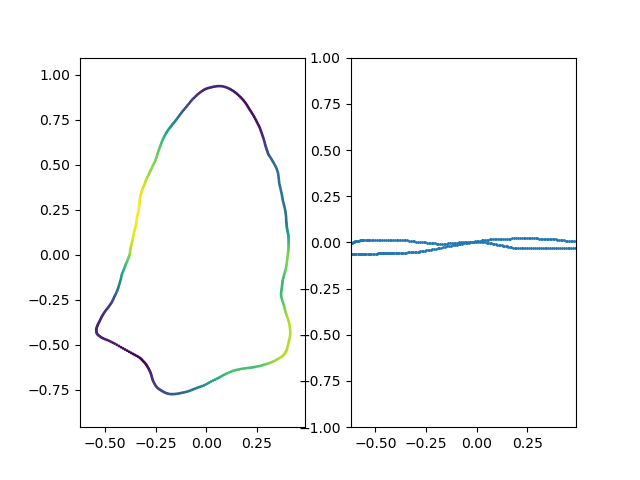

interactive(children=(IntSlider(value=-12, description='comp1', max=15, min=-15), IntSlider(value=-6, descript…

In [4]:
fig, axs = plt.subplots(1, 2)

starting_leaf = train_ds[0].reshape(train_ds[0].shape[0]*train_ds[0].shape[1])
starting_weights = leaf_encoding.compress(starting_leaf, pca.components_[:50], pca)
original_shape = train_ds[0].shape

outline1 = axs[0].scatter(train_ds[0][:,0],train_ds[0][:,1], s=1)
outline2 = axs[1].scatter(train_ds[0][:,0],train_ds[0][:,2], s=1)
plt.ylim([-1, 1])

def update(comp1, comp2, comp3):
    updated_weights = starting_weights[:]
    updated_weights[0] = comp1
    updated_weights[1] = comp2
    updated_weights[2] = comp3
    reprojection = leaf_encoding.decompress(updated_weights, pca.components_[:50], pca)
    unrolled = reprojection.reshape(original_shape) # restack
    outline1.set_offsets(unrolled[:,:2])
    outline1.set_array(unrolled[:,2])
    outline2.set_offsets(unrolled[:,1:])
    fig.canvas.draw_idle()

interact(update, \
         comp1 = widgets.IntSlider(value=starting_weights[0], min=-15.0, max=15.0), \
         comp2 = widgets.IntSlider(value=starting_weights[1], min=-15.0, max=15.0), \
         comp3 = widgets.IntSlider(value=starting_weights[2], min=-10.0, max=10.0));




<IPython.core.display.Javascript object>


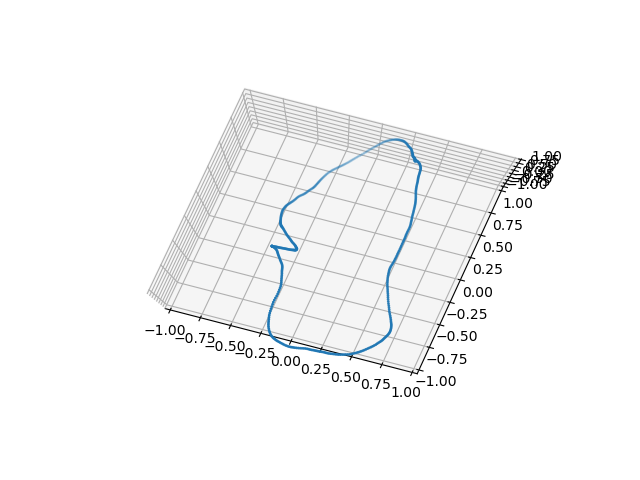

interactive(children=(IntSlider(value=-12, description='comp1', max=15, min=-15), IntSlider(value=-6, descript…

<function __main__.update(comp1, comp2, comp3, comp4, comp5, comp6, comp7, comp8, comp9, comp10)>

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

starting_leaf = train_ds[0].reshape(train_ds[0].shape[0]*train_ds[0].shape[1])
starting_weights = leaf_encoding.compress(starting_leaf, pca.components_[:50], pca)
original_shape = train_ds[0].shape

scatterplot = ax.scatter(xs=train_ds[0][:,0], ys=train_ds[0][:,1], zs=train_ds[0][:,2], s=1)
plt.ylim([-1, 1])
plt.xlim([-1, 1])
ax.set_zlim(-1,1)


def update(comp1, comp2, comp3, comp4, comp5, comp6, comp7, comp8, comp9, comp10):
    updated_weights = starting_weights[:]
    updated_weights[0] = comp1
    updated_weights[1] = comp2
    updated_weights[2] = comp3
    updated_weights[3] = comp4
    updated_weights[4] = comp5
    updated_weights[5] = comp6
    updated_weights[6] = comp7
    updated_weights[7] = comp8
    updated_weights[8] = comp9
    updated_weights[9] = comp10
    
    reprojection = leaf_encoding.decompress(updated_weights, pca.components_[:50], pca)
    unrolled = reprojection.reshape(original_shape) # restack
    scatterplot._offsets3d = (unrolled[:,0],unrolled[:,1],unrolled[:,2])
    fig.canvas.draw_idle()

interact(update, \
         comp1 = widgets.IntSlider(value=starting_weights[0], min=-15.0, max=15.0), \
         comp2 = widgets.IntSlider(value=starting_weights[1], min=-15.0, max=15.0), \
         comp3 = widgets.IntSlider(value=starting_weights[2], min=-10.0, max=10.0), \
         comp4 = widgets.IntSlider(value=starting_weights[2], min=-10.0, max=10.0), \
         comp5 = widgets.IntSlider(value=starting_weights[2], min=-5.0, max=5.0), \
         comp6 = widgets.IntSlider(value=starting_weights[2], min=-5.0, max=5.0), \
         comp7 = widgets.IntSlider(value=starting_weights[2], min=-5.0, max=5.0), \
         comp8 = widgets.IntSlider(value=starting_weights[2], min=-5.0, max=5.0), \
         comp9 = widgets.IntSlider(value=starting_weights[2], min=-5.0, max=5.0), \
         comp10 = widgets.IntSlider(value=starting_weights[3], min=-5.0, max=5.0))

